# Predicting Stock Market Using Simple Linear Regression
## By Dominic Antigua

In [1]:
# Importing the Data Science python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Exploratory Data Analysis

In [2]:
# Read the Apple Inc. Stock data 
df = pd.read_csv("./data/Appleinc_stock.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [3]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9909 non-null   object 
 1   Open       9909 non-null   float64
 2   High       9909 non-null   float64
 3   Low        9909 non-null   float64
 4   Close      9909 non-null   float64
 5   Adj Close  9909 non-null   float64
 6   Volume     9909 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 542.0+ KB


In [4]:
# Statistical summary of the dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000,9.909000e+03
mean,32.606849,32.936079,32.277560,32.618030,30.576570,8.582916e+07
std,58.415759,59.001576,57.883037,58.471899,56.746275,8.597195e+07
min,0.198661,0.198661,0.196429,0.196429,0.155638,3.472000e+05
25%,1.071429,1.089286,1.048571,1.071429,0.917643,3.304230e+07
50%,1.729286,1.758929,1.696429,1.732143,1.466154,5.766490e+07
75%,35.799999,36.265713,35.328571,35.761429,31.042374,1.069992e+08
max,324.739990,327.850006,323.350006,327.200012,327.200012,1.855410e+09


In [5]:
# Checks if there's null value in the dataset
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
# Convert Date to Datetime object
df['Date'] = pd.to_datetime(df['Date'])

### Closing price between 1990 and 2020 (April. 1)

#### My Insights:
- Time goes by, the stock movement of the Apple Inc. is increasing
- I conclude that there's a trend between Close and Date

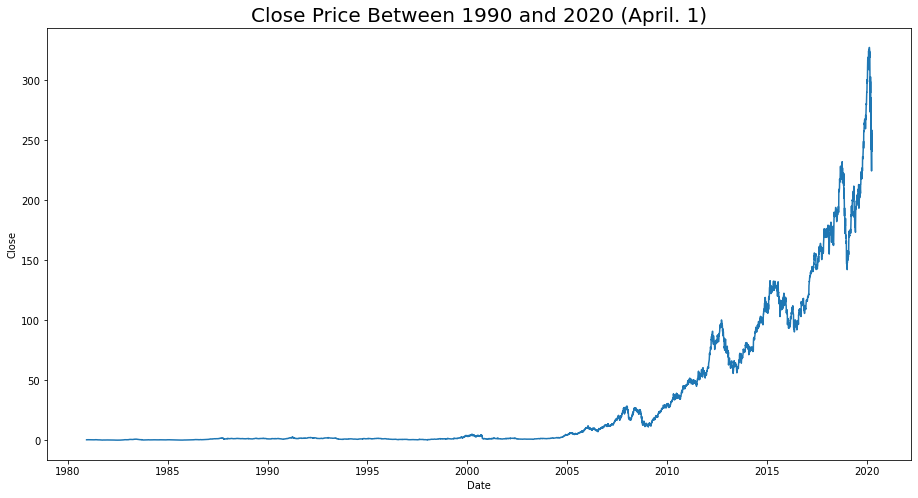

In [7]:
# Create line plot to see trends
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Close Price Between 1990 and 2020 (April. 1)", fontsize=20)
sns.lineplot(data=df, x='Date', y='Close');

### Zooming Out The Close stock price to 2019 and 2020 (April. 1)

#### My Insights:
- To make more precise and accurate our model, we will zoom out the data from 2019

In [8]:
# Get only the data from 2019 to the rest
df = df[(df['Date'].dt.year >= 2019)]

In [9]:
# Create Days column that counts how many days 
df['Day'] = df['Date'].sub(pd.Timestamp(df['Date'].min())).dt.days
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day
9594,2019-01-02,154.889999,158.850006,154.229996,157.919998,155.214005,37039700,0
9595,2019-01-03,143.979996,145.720001,142.000000,142.190002,139.753540,91312200,1
9596,2019-01-04,144.529999,148.550003,143.800003,148.259995,145.719513,58607100,2
9597,2019-01-07,148.699997,148.830002,145.899994,147.929993,145.395203,54777800,5
9598,2019-01-08,149.559998,151.820007,148.520004,150.750000,148.166870,41025300,6


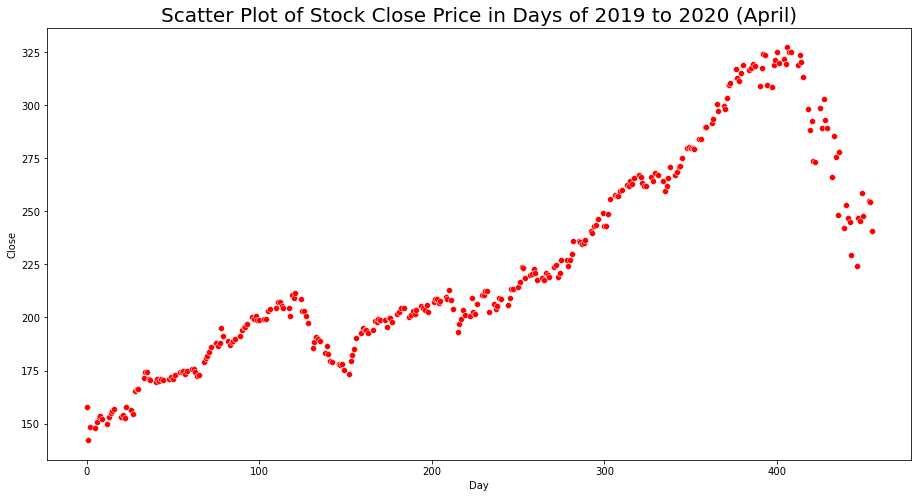

In [10]:
# Plotting the 2019 datapoints
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Scatter Plot of Stock Close Price in Days of 2019 to 2020 (April)", fontsize=20)
sns.scatterplot(data=df, x='Day', y='Close', color='red');

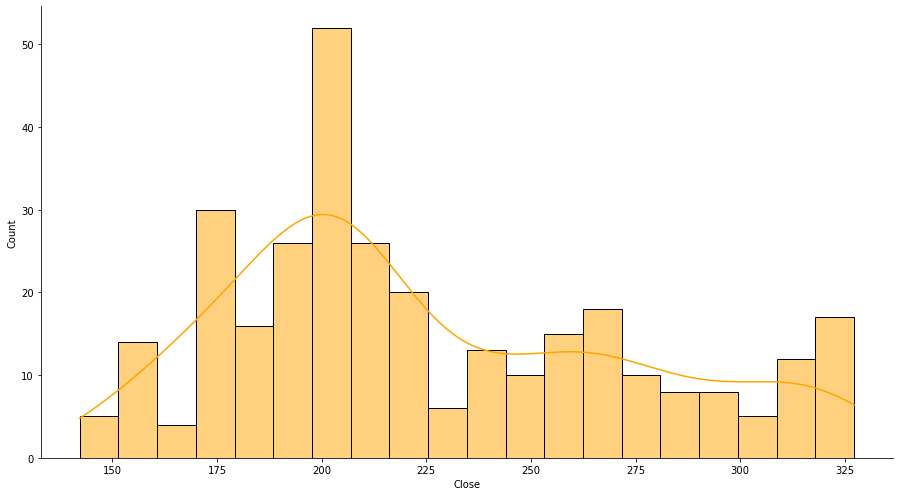

In [11]:
# Distribution plot of Stock Close data
sns.displot(data=df, x='Close', bins=20, kde=True, height=7, aspect=1.8, color='orange');

## Training The Linear Regression Model

In [12]:
# Getting the Input and Label for our model
feature = df[['Day']]
label = df[['Close']]

In [13]:
# Initializae Linear Regression
model = LinearRegression()

In [14]:
# Fit the data in Linear Regression
model.fit(feature, label)

LinearRegression()

In [15]:
# The slope and y-intercept of the LR equation
m = round(model.coef_[-1][-1], 2)
b = round(model.intercept_[-1], 2)
print("Y-intercept:", b)
print("Slope:", m)
print("-----------------------------\nEquation: y = "+ str(b) +" + "+ str(m)+"x")

Y-intercept: 150.68
Slope: 0.33
-----------------------------
Equation: y = 150.68 + 0.33x


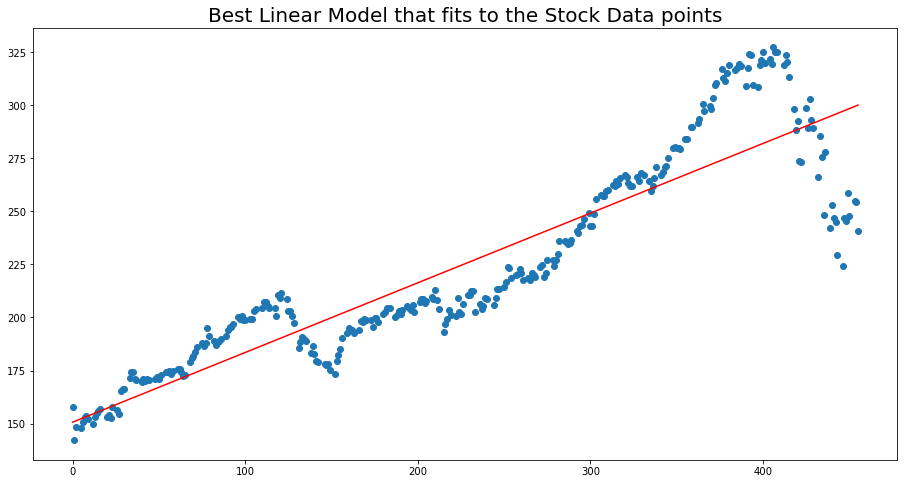

In [16]:
# Plotting the linear regression model fit in the data points
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Best Linear Model that fits to the Stock Data points", fontsize=20)
ax.scatter(feature, label)
ax.plot(feature, model.predict(feature), color='r');

In [17]:
# Predict using the LR model
model_df = feature.copy()
model_df['Actual'] = label.copy()
model_df['Predicted'] = model.predict(feature)
model_df = model_df.set_index(keys= "Day")
model_df.tail()

,Actual,Predicted
Day,,
449,258.440002,298.069391
450,247.740005,298.397657
453,254.809998,299.382453
454,254.289993,299.710719
455,240.910004,300.038984


## Evaluation

In [18]:
# Errors between predicted value and true value
prediction = model.predict(feature)
print('Mean Absolute Error:', metrics.mean_absolute_error(label, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(label, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(label, prediction)))

Mean Absolute Error: 15.891694423032327
Mean Squared Error: 415.99176851248086
Root Mean Squared Error: 20.39587626243307


## Forecasting: Apple Inc. stock movement in the next seven days.

This is my prediction on the stock market movement in the next seven days of Apple Inc.

In [19]:
# Predict the 7 days
forecast = pd.DataFrame({"Day":[], "Prediction":[]})
max_day = feature.max()[0]
for i in range(1, 8):
    future_day = max_day+i
    future_pred = model.predict([[future_day]]).ravel()[0]
    forecast = forecast.append(pd.DataFrame({"Day": future_day, "Prediction":[future_pred]}), ignore_index=True)

forecast['Day'] = forecast['Day'].astype(int)
forecast = forecast.set_index(keys= "Day")

In [20]:
# This is the 7 days stock movement forecast of the Apple Inc.
forecast

,Prediction
Day,
456,300.367250
457,300.695515
458,301.023781
459,301.352046
460,301.680312
461,302.008577
462,302.336843
